# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier
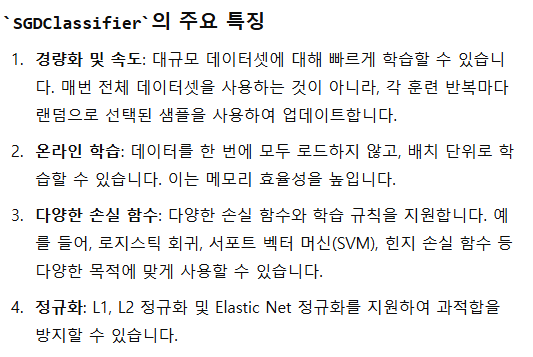

In [22]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.dtypes

Species      object
Weight      float64
Length      float64
Diagonal    float64
Height      float64
Width       float64
dtype: object

In [23]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [24]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

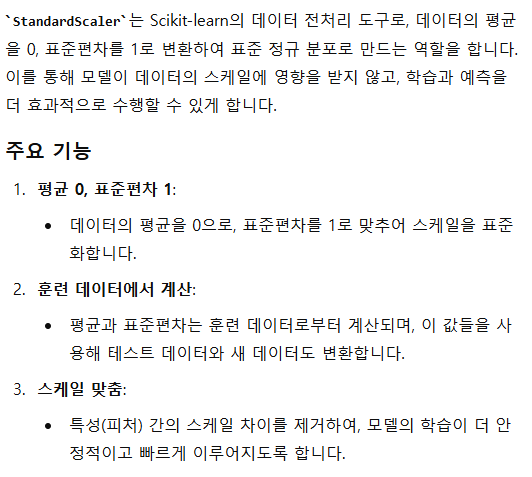

In [25]:
from sklearn.preprocessing import StandardScaler  # 데이터 전처리를 위한 StandardScaler 모듈을 불러옵니다

# StandardScaler 객체를 생성합니다
ss = StandardScaler()

# 훈련 데이터(train_input)로 StandardScaler를 학습합니다
# 이 단계에서 평균과 표준편차를 계산하여 scaler 객체에 저장합니다
ss.fit(train_input)

# 훈련 데이터(train_input)를 변환합니다
# 평균이 0, 분산이 1이 되도록 데이터를 표준화합니다
train_scaled = ss.transform(train_input)

# 테스트 데이터(test_input)를 변환합니다
# 훈련 데이터에서 계산한 평균과 표준편차를 사용하여 테스트 데이터를 표준화합니다
test_scaled = ss.transform(test_input)

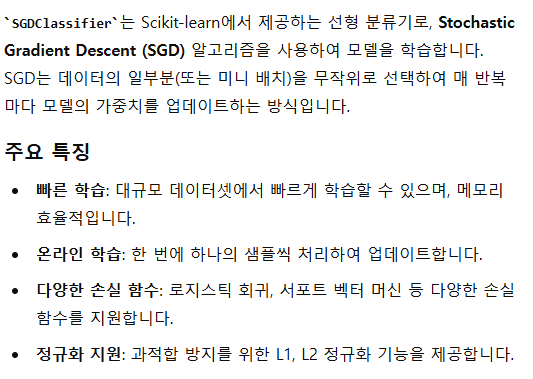

In [26]:
from sklearn.linear_model import SGDClassifier  # SGDClassifier를 불러옵니다

# SGDClassifier 객체를 생성합니다
# loss='log_loss'는 로지스틱 회귀를 의미하며, max_iter는 최대 반복 횟수, random_state는 재현성을 위한 시드 값입니다
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

# 표준화된 훈련 데이터와 타겟 레이블을 사용하여 모델을 훈련합니다
sc.fit(train_scaled, train_target)

# 훈련 데이터에 대한 정확도를 출력합니다
# 훈련 데이터에 대한 모델의 성능을 평가합니다
print(sc.score(train_scaled, train_target))

# 테스트 데이터에 대한 정확도를 출력합니다
# 테스트 데이터에 대한 모델의 성능을 평가합니다
print(sc.score(test_scaled, test_target))


0.773109243697479
0.775


c:\ProgramData\anaconda3\envs\practice_mldl\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


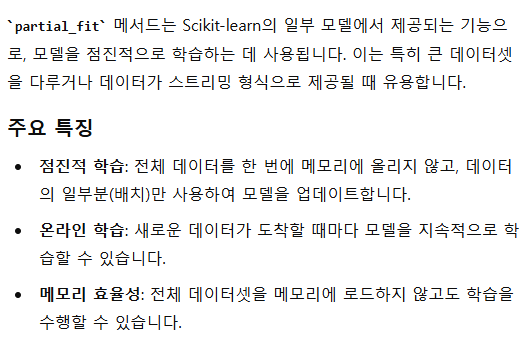

In [27]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


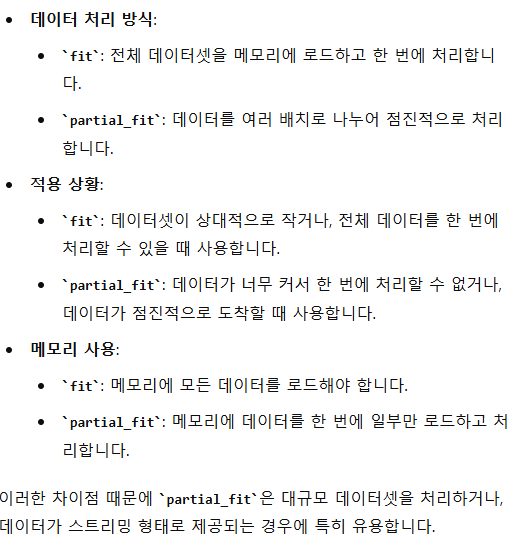

## 에포크와 과대/과소적합

In [41]:
import numpy as np  # NumPy 라이브러리를 불러옵니다

# SGDClassifier 객체를 생성합니다.
# 'loss'를 'log_loss'로 설정하여 로지스틱 회귀 손실 함수를 사용합니다. # 로그로스 사용해야함 로스하면 실행불가 
# 'random_state'는 결과의 재현성을 위해 설정합니다.
sc = SGDClassifier(loss='log_loss', random_state=42)

# 훈련 데이터와 테스트 데이터의 성능 점수를 저장할 리스트를 초기화합니다.
train_score = []  # 훈련 데이터에 대한 성능 점수를 저장합니다.
test_score = []   # 테스트 데이터에 대한 성능 점수를 저장합니다.

# 훈련 데이터의 클래스 레이블을 가져옵니다.
# partial_fit 메서드에서 모든 가능한 클래스 레이블을 명시적으로 지정하는 데 필요합니다.
classes = np.unique(train_target)


In [43]:
for _ in range(0, 300):  # 0부터 299까지 총 300번 반복하는 루프를 시작합니다.
    # 현재 배치 데이터와 클래스 레이블을 사용하여 모델을 점진적으로 학습합니다.
    # 'partial_fit' 메서드는 전체 데이터가 아닌 현재 제공된 데이터를 사용하여 모델을 업데이트합니다.
    sc.partial_fit(train_scaled, train_target, classes=classes)

    # 훈련 데이터에 대한 모델의 성능 점수를 계산하고 리스트에 추가합니다.
    # 'score' 메서드는 모델의 예측 정확도를 반환합니다.
    train_score.append(sc.score(train_scaled, train_target))

    # 테스트 데이터에 대한 모델의 성능 점수를 계산하고 리스트에 추가합니다.
    # 테스트 데이터에 대한 점수는 모델의 일반화 성능을 평가하는 데 사용됩니다.
    test_score.append(sc.score(test_scaled, test_target))


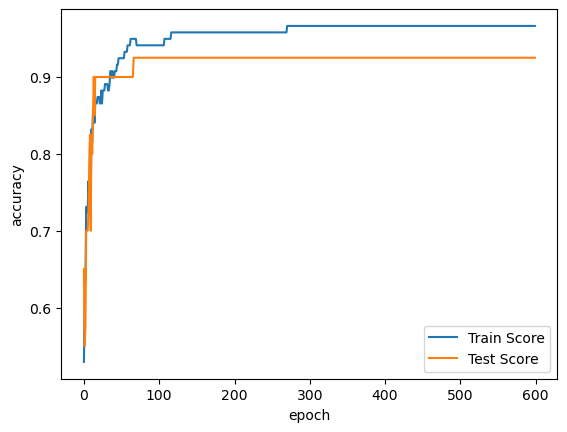

In [52]:
import matplotlib.pyplot as plt  # matplotlib의 pyplot 모듈을 불러옵니다. 그래프를 그리는 데 사용됩니다.

# 훈련 데이터에 대한 정확도 점수를 플로팅합니다.
# 'train_score' 리스트는 각 반복(epoch) 후 훈련 데이터에 대한 정확도 점수를 저장합니다.
plt.plot(train_score, label='Train Score')

# 테스트 데이터에 대한 정확도 점수를 플로팅합니다.
# 'test_score' 리스트는 각 반복(epoch) 후 테스트 데이터에 대한 정확도 점수를 저장합니다.
plt.plot(test_score, label='Test Score')

# x축 레이블을 설정합니다. 이 경우, 'epoch'는 반복 횟수를 의미합니다.
plt.xlabel('epoch')

# y축 레이블을 설정합니다. 이 경우, 'accuracy'는 정확도를 의미합니다.
plt.ylabel('accuracy')

# 그래프에 범례를 추가하여 어떤 선이 훈련 데이터에 대한 정확도인지, 테스트 데이터에 대한 정확도인지 구분할 수 있게 합니다.
plt.legend()

# 그래프를 화면에 표시합니다.
plt.show()


In [53]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [54]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
